# Imports

In [69]:
from tqdm import tqdm
import KSAT_properties
import importlib
importlib.reload(KSAT_properties)
import matplotlib.pyplot as plt

# Percentage Solved

In [ ]:
M = [200, 400, 500, 600, 700, 800, 900, 1000]
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m)

# Algorithmic Threshold Analysis

In [38]:
N = [200,300,400,500,600]
M_alg = {}
for n in tqdm(N):
    mid_M = KSAT_properties.find_threshold(n, target_prob=0.5, min_M=100, max_M=500)
    M_alg[n] = mid_M

  0%|          | 0/5 [00:00<?, ?it/s]

0.9666666666666667 300
0.43333333333333335 400
0.9 350


 20%|██        | 1/5 [00:16<01:04, 16.07s/it]

0.5 375
0.9333333333333333 300
0.6333333333333333 400
0.36666666666666664 450
0.4 425
0.4666666666666667 412
0.6666666666666666 406
0.5666666666666667 409


 40%|████      | 2/5 [01:02<01:42, 34.11s/it]

0.5 410
0.7 300
0.5666666666666667 400
0.36666666666666664 450
0.3333333333333333 425
0.4666666666666667 412
0.7 406
0.5333333333333333 409


 60%|██████    | 3/5 [02:01<01:30, 45.31s/it]

0.43333333333333335 410
0.5666666666666667 300
0.4 400
0.3 350
0.5333333333333333 325
0.5666666666666667 337
0.4666666666666667 343


 80%|████████  | 4/5 [03:01<00:51, 51.26s/it]

0.5 340


100%|██████████| 5/5 [03:11<00:00, 38.33s/it]

0.5 300


In [39]:
M_alg

{200: 375, 300: 410, 400: 410, 500: 340, 600: 300}

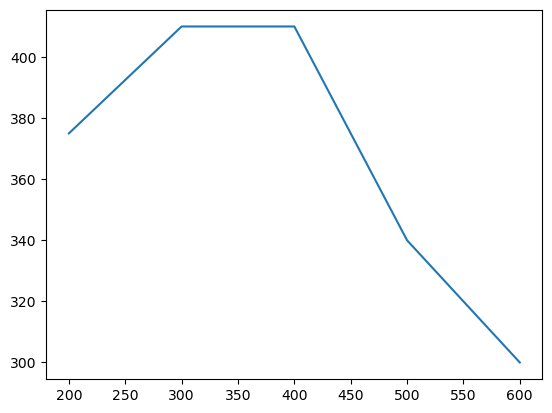

In [40]:
plt.plot(M_alg.keys(), M_alg.values())

In [37]:
KSAT_properties.empirical_probability(N = 300, M = 300)
#find_threshold(300, target_prob=0.5, min_M=100, max_M=1000)

0.7